In [1]:
# Ria Patel - June 28, 2019
# Using 3 qubits, teleport the 1st qubit to the 3rd qubit

# Imports needed libraries/tools
import qiskit as qk
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute, Aer
from qiskit import IBMQ
from qiskit.tools.visualization import plot_histogram

# Used for mpl drawing at the end
style = {'backgroundcolor':'#FB7685'}

# Sets up the registers and the circuit
q = QuantumRegister(3)
c0 = ClassicalRegister(1)
c1 = ClassicalRegister(1)
c2 = ClassicalRegister(1)
qc = QuantumCircuit(q,c0, c1, c2)

{'0 1 0': 248, '0 0 1': 264, '0 1 1': 272, '0 0 0': 240}


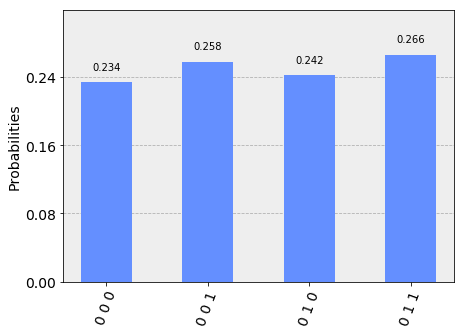

In [2]:
# Puts 1st qubit in superposition
qc.h(q[0])

# Creates one Bell state to create entanglement for 2nd & 3rd qubits
qc.h(q[1])
qc.cx(q[1], q[2])

qc.barrier(q)

# Transfers 1st qubit's state to 2nd qubits
qc.cx(q[0], q[1])

qc.barrier(q)

# Applies Hadamard Gate to 1st qubit
qc.h(q[0])

qc.barrier(q)

# Measure 1st & 2nd qubits
qc.measure(q[0], c0[0])
qc.measure(q[1], c1[0])

# Simulates the circuit & plots histogram
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()
measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

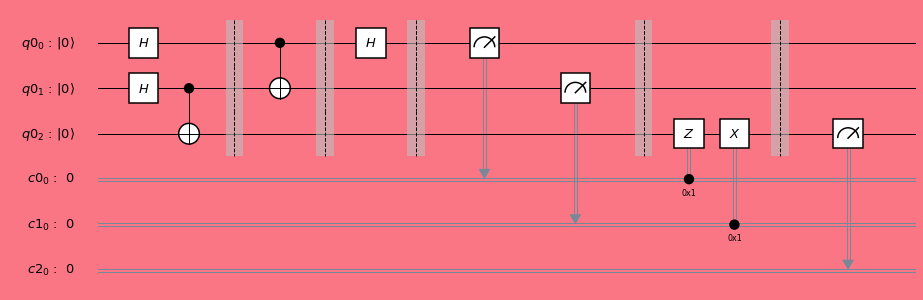

In [3]:
qc.barrier(q)

# Certain gates applied to 3rd qubit as 1st qubit is measured
qc.z(q[2]).c_if(c0, 1)
qc.x(q[2]).c_if(c1, 1)

qc.barrier(q)

# Measure 2nd qubit
qc.measure(q[2], c2[0])

qc.draw(output='mpl', style=style)

{'0 1 0': 136, '1 0 0': 145, '1 0 1': 125, '0 0 1': 116, '0 1 1': 118, '1 1 0': 128, '1 1 1': 126, '0 0 0': 130}


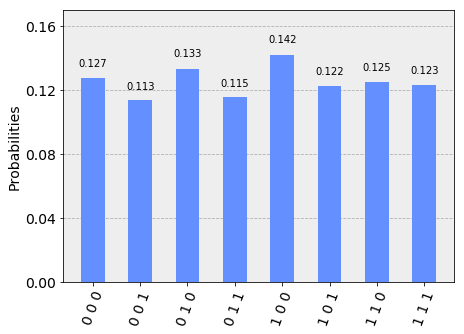

In [4]:
# Simulates the circuit & plots histogram
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()
measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)